# INFS 768
## Assignment 1
#### kNN Model With Sckit-Learn
##### Kevin Kuipers
##### 9/26/2019

<p style="font-family: Arial; font-size:3.0em;color:#2462C0; font-style:bold"><br>Introduction<br><br></p>

<p style="font-family: Arial; font-size:1.0em;color:#2462C0; font-style:bold"><br>
The purpose of the project is being able to classify iris species based on several features. There are four features record in this dataset: length and width of the both the sepels and petals. The measurements were recorded in centimeters. The target variable is the iris species itself. The iris species in the dataset are setosa, versicolor, and virginica. Since the target variable consists of three categories, this is a classification problem. Therefore, we will be using a classification model known as k-nearest neighbors to try and identify the correct iris species. <br><br></p>

<p style="font-family: Arial; font-size:3.0em;color:#2462C0; font-style:bold"><br>k-NN<br><br></p>
<p style="font-family: Arial; font-size:1.0em;color:#2462C0; font-style:bold"><br> k-Nearest Neighbor (k-NN) is a algorithm used in both classification and regression problems. In this notbook file it will be used for a classification problem. k-NN is non-parametric, lazy learning algorithm. parametric techinques means that it makes no assumptions based on the underlying data distribution or statistical measures.  This comes in handy since most real life problems pertaining to data are not normally distributed. Lazy leaner means it has to store all the data to make future predictions. Therefore, it can require much memory to hold it all.<br><br></p>



##### k-NN algorithm uses the feature similarity to identify the class of the target object. The "k" represents the number of neighbors we want to look for in order to classify the problem. The larger the "k" the more number of votes it needs to classify the incoming data to that neighborhood (class). The converse is that the lower the "k" the less votes it needs to decide if an object belongs to that neighborhood (class).

##### Now I will begin by loading all the libraries and outputting their version. Not all of them may be used in the project but it is nice having them all loaded just incase they need to be called.  Then I will load the dataset found in the sklearn library.

In [1]:
#Loading various libaries 

import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.24.2
matplotlib version: 3.1.1
NumPy version: 1.16.4
SciPy version: 1.2.1
IPython version: 7.6.1
scikit-learn version: 0.21.2


In [2]:
#Loading the dataset

from sklearn.datasets import load_iris
iris_dataset = load_iris()

#Saving the datset to a shorter name just known as iris
iris = iris_dataset

In [3]:
#Printing the keys of the dataset

print("Key of the iris_dataset: \n{}".format(iris.keys()))

Key of the iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
#Looking at the characteristics of the data set

print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


##### It appears that there are 150 observations in this dataset. As mentioned previous there are 3 classes (the three types of iris specieis). This also displays how many obsverations there are for each class. In this case the dataset is evenly divided between the thre iris specieis. As mentioned previously, there are 4 abbritutes (features). 

In [5]:
#Outputting the names of the three classes--types of iris species

print("Target names: {}".format(iris['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
#Outputting the feature names in the data set

print("Feature names: \n{}".format(iris['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#The data contains classes for the target variable but the features are all numeric
print("Type of data: {}".format(type(iris['data'])))

Type of data: <class 'numpy.ndarray'>


In [8]:
#Looking at the shape of the data set. This will tell us the number of observations and features

print("shape of the data: {}".format(iris['data'].shape))

shape of the data: (150, 4)


In [9]:
#Lets look at the first five rows od the iris dataset by slicing the dataset

print("First five rows of the data :\n{}".format(iris['data'][:5]))

First five rows of the data :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
#Looking at the target since it was measured as a NumPy array:

print("Type of target: {}".format(type(iris['target'])))

Type of target: <class 'numpy.ndarray'>


In [11]:
#The target is a one-deminionsal array, with on entry per flower:

print("Shape of the target: {}".format(iris['target'].shape))

Shape of the target: (150,)


In [12]:
#150 observations with 1 column

#Now lets see how the target variables are coded:

print("Target:\n{}".format(iris['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
#It appears the target variables are coded: "0", "1", "2"

#Training-Test split
#scikit-learn has a nice feature to split the data between training and test.
#The training set will contain 75% of the data for developing the model
#the testing set will be used to validate the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0)

In [14]:
#Lets look at the shape of the X_train, X_test, y_train, y_test

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [15]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [16]:
#As we can see from the shape output the X_train and y_train both have 112 observations but
#the X_train has the features and y_train has the target variable
#X_test and y_test both have 38 observations but x_test has the features and y_test has the target variabel

<p style="font-family: Arial; font-size:3.0em;color:#2462C0; font-style:bold"><br>Data Exploration<br><br></p>

<p style="font-family: Arial; font-size:1.0em;color:#2462C0; font-style:bold"><br>One the most important aspects of building a model for a given data set is the data exploration phase. During this process one looks at the visualizations and descriptive statistics. Things like histograms, scatter plots, and descriptive statistics help reveal the nature of the data. Since all our features are continuous variables and the target variable is a categorical we can look at scatter plots and colors the points based on the category to see if we find any patterns. <br><br></p>

In [17]:
#Creating the scatter plot from the X_train data setset 
#In order to create the scatter plot the iris training set will be made into a data frame.
#!pip install mglearn
import mglearn
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15),
                          marker='o', hist_kwds={'bins': 20}, s=60,
                          alpha=.8, cmap=mglearn.cm3)

C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8AB1EBD30>,
      dtype=object)

##### For many of the plots it appears each iris species cluster with in their own class.  Overall, the groups cluster in specific patterns. Therefore, a k-NN model should work well for classifying the target variable (iris species).

<p style="font-family: Arial; font-size:3.0em;color:#2462C0; font-style:bold"><br>Developing the model<br><br></p>

In [18]:
#developing the model using k = 1

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [19]:
#fitting the model

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
#Making a quick prediction
#based on the manual data enter below it will be used against the model to predict what iris specieis it is
X_new = np.array([[5,2.9,1,0.2]])

print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [21]:
pred = knn.predict(X_new)
print("Prediction: {}".format(pred))
print("Predicted targetname: {}".format(
        iris['target_names'][pred]))



Prediction: [0]
Predicted targetname: ['setosa']


##### Using the training data set and running the manual entered data, the model classifies it as a setosa iris species. 

<p style="font-family: Arial; font-size:3.0em;color:#2462C0; font-style:bold"><br>Evaluating the Model<br><br></p>

<p style="font-family: Arial; font-size:1.0em;color:#2462C0; font-style:bold"><br>Now that a model has been developed using the training data (75% of the data set), it will be tested to see how well it performs. This will be using the testing data (the other 25% of the data) to see how the model classifies it. This can be used to determing the accuracy of rate of the model.<br><br></p>

In [22]:
#Model testing

y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [23]:
#Accuracy rate of the model predictions vs actual iris species
print("Test set score: {:.2f}".format(np.mean((y_pred==y_test))))

Test set score: 0.97


<p style="font-family: Arial; font-size:3.0em;color:#2462C0; font-style:bold"><br>Outcome<br><br></p>
<p style="font-family: Arial; font-size:1.0em;color:#2462C0; font-style:bold"><br>When assessing a model's performance, the confusion matrix is helpful for interpreting the accuracy, precision, and recall. In this case we are only looking at the accuracy of the model. Meaning, what was the percentage that the model correctly identified the iris species. In this particular example, the model correctly identified the testing set 97% of the time. Therefore, the error rate is only 3%; meaning it incorrectly classified 3% of the testing set. This is a very high accuracy rate. <br><br></p>

In [24]:
#The entire code for training and testing the dataset all in one chunk

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0)

#developing and fitting the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#Outputting the model accuracy
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


# Parameter tuning

##### Lets look at some hyperparameter tuning to determine which value for k (nearest neighbors) produces the highest accruacy score. Since the data set is small cross validation (CV) will be used to help validate and determine the optimal value for k value. sklearn.model_selection has an easy to use algorithm for computing the CV scores on a given model. I will look at 5 fold and 10 fold CV scores. 

# 5 Fold Cross Validation for Optimal K-value

The optimal number of neighbors based of the 5-fold CV is 7


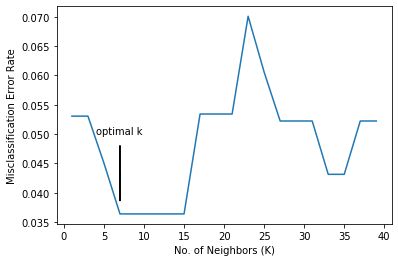

In [31]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# creating an odd list of k values for k-NN model for determing score
klist = list(range(1,40))

#subseting just the odd ones
n = list(filter(lambda x: x % 2 != 0, klist))

#creating an empty list that will contain CV scores

cv_scores_5 = []

#peform 5-fold cross validation using a for loop to loop through the data with various Ks
#and holding the CV scores--in this case it will be the accuracy of model. 
for k in n:
    knn_5 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_5, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_5.append(scores.mean())
    
#calculating the MSE (Mean Squared Error value) for the misclassification error rate
MSE_5 = [1 - x for x in cv_scores_5]

#returning the optimal value of k 
best_k_5 = n[MSE_5.index(min(MSE_5))]
print("The optimal number of neighbors based of the 5-fold CV is %d" % best_k_5)

plt.plot(n, MSE_5)
plt.xlabel('No. of Neighbors (K)')
plt.ylabel('Misclassification Error Rate')
plt.text(4, 0.050, r'optimal k')

plt.arrow(7, 0.048, 0.001, -0.005)
plt.show()


# 10 Fold Cross Validation for Optimal K-value

The optimal number of neighbors based of the 10-fold CV is 7


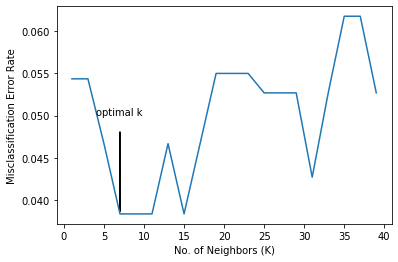

In [26]:
from sklearn.model_selection import cross_val_score

# creating an odd list of k values for k-NN model for determing score
klist = list(range(1,40))

#subseting just the odd ones
n = list(filter(lambda x: x % 2 != 0, klist))

#creating an empty list that will contain CV scores

cv_scores_10 = []

#peform 10-fold cross validation using a for loop to loop through the data with various Ks
#and holding the CV scores--in this case it will be the accuracy of model. 
for k in n:
    knn_10 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_10, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores_10.append(scores.mean())
    
#calculating the MSE (Mean Squared Error value) for the misclassification error rate
MSE_10 = [1 - x for x in cv_scores_10]

#returning the optimal value of k 
best_k_10 = n[MSE_10.index(min(MSE_10))]
print("The optimal number of neighbors based of the 10-fold CV is %d" % best_k_5)

plt.plot(n, MSE_10)
plt.xlabel('No. of Neighbors (K)')
plt.ylabel('Misclassification Error Rate')
plt.text(4, 0.050, r'optimal k')

plt.arrow(7, 0.048, 0.001, -0.005)
plt.show()


##### Using both 5-fold CV and 10-fold CV the optimal value for k is 7. Therefore, train and test the model with k=7 to see if the score improves from previously

# K (Nearest Neighbors = 7)

In [27]:
#fitting the model with k = 7

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

#Outputting the model accuracy
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))



Test set score: 0.97


##### It appears the test score is still 97% accuracy. This is the same when k = 1. But for the model to generalize to new incoming data k=7 may be a better fit.

<p style="font-family: Arial; font-size:3.0em;color:#2462C0; font-style:bold"><br>k-NN strengths<br><br></p>
<p style="font-family: Arial; font-size:1.0em;color:#2462C0; font-style:bold"><br>There are pros and cons with k-NN models. One of the strengths with k-NN model is that it is non-parametic model. This means it does not make assumptions about the underlying data, and is useful for non linear data. Whereas, parametic models assume the data is normally distributed and has other assumptons to follow. If those assumptios are not met for parametric data, it has to be transformed. Another strength for k-NN model, is that the model is very easy to interpret, implement, and explain--especially visually. The model accuracy is very high in the case. The k-NN model can be used for classification and regression.<br><br></p>

<p style="font-family: Arial; font-size:3.0em;color:#2462C0; font-style:bold"><br> k-NN weaknesses<br><br></p>

<p style="font-family: Arial; font-size:1.0em;color:#2462C0; font-style:bold"><br>
One of the draw backs is that the k-NN model is a lazy learner. This means it has to hold all the training data to make predictions. Therefore, if it is a very large data set then run times can be slow and requires much memory. k-NN is also very sensitive to outliers or if one type of classifier is predominate in dataset. In this cases, the data was divided evenly between iris species--a 1/3 of the data represented iris species (class). However, if the data predominately contains one class over the other, k-NN is more likely to classify the predominate occuring class. k-NN model works better with smaller feature selections and does not handle well when their are lots of features. This means it suffers in dimensionality data sets where there are many, many features. <br><br></p>